In [1]:
from acip.acip import ACIP
from utils.utils_experiment import read_config, load_data
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#plt.ioff()
dataset = 'spleen'
X, Y, gene_ids = load_data(dataset)
w = ACIP(X, Y, config=dataset, verbose=True)
w.set_col_names(gene_ids)


*************** Filtering genes ******************


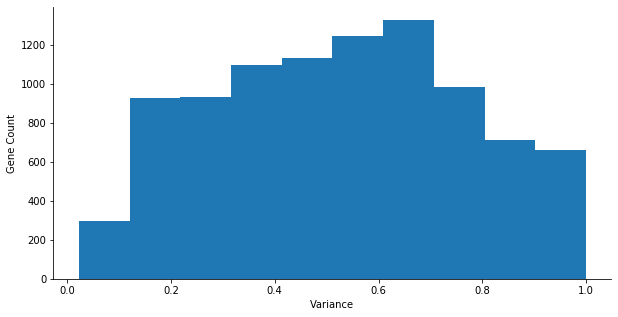

In [3]:
w.filter_genes()

In [4]:
w.reduce_dim()


*********** Reducing dimensionality **************
Using pca.
Using the following params:
{
    "n_components": 15
}
Embedding created. MSE: 0.7981454
Used 15 components.



****************** Clustering ********************
Using kmedoids.
Using the following params:
{
    "metric": "correlation"
}
Trying n_clusters=14: 100%|██████████| 7/7 [00:08<00:00,  1.27s/it]
Clustering complete.
Highest silhouette score is achieved for n_clusters = 4


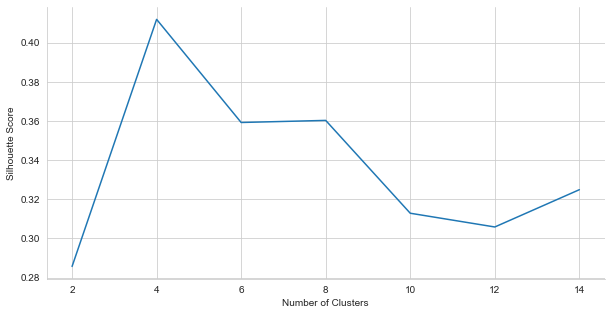

In [5]:
w.cluster()


***************** Visualizing ********************
Using umap with the following params:
{
    "dims": 2,
    "metric": "correlation",
    "min_dist": 0,
    "n_neighbors": 15
}
Reducing dimensionality for visualization using umap.


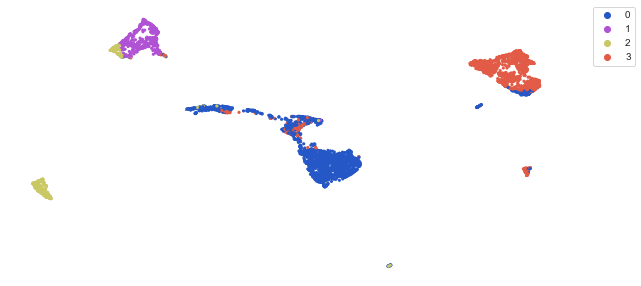

In [6]:
w.reduce_plot()

Cluster id: 100%|██████████| 4/4 [00:16<00:00,  4.08s/it]


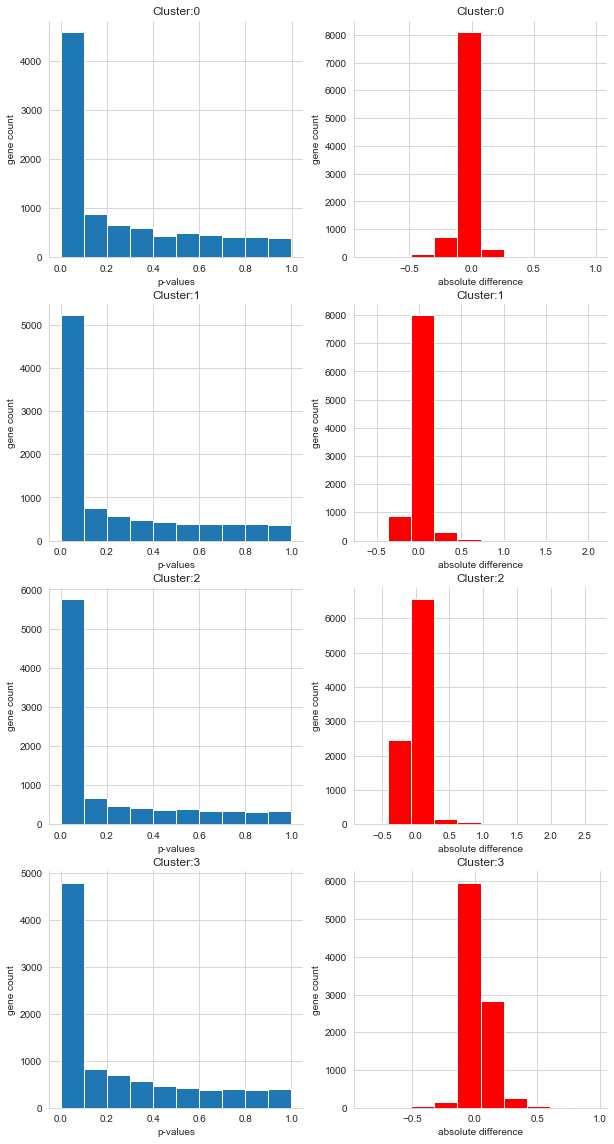

In [7]:
w.get_markers()

In [8]:
w.markers

array([array([], dtype=object),
       array(['ENSG00000104918.8', 'ENSG00000164733.21', 'ENSG00000221869.5',
       'ENSG00000011600.11', 'ENSG00000112096.18', 'ENSG00000216490.4',
       'ENSG00000084234.17', 'ENSG00000103569.10', 'ENSG00000102265.12',
       'ENSG00000018280.17', 'ENSG00000117984.14', 'ENSG00000110203.9',
       'ENSG00000122862.5', 'ENSG00000120885.22', 'ENSG00000115590.14',
       'ENSG00000197405.8', 'ENSG00000177575.12', 'ENSG00000105835.12',
       'ENSG00000085265.11', 'ENSG00000167996.16', 'ENSG00000163563.8',
       'ENSG00000026025.16', 'ENSG00000170458.14', 'ENSG00000021355.13',
       'ENSG00000111640.15', 'ENSG00000090382.6', 'ENSG00000137801.11',
       'ENSG00000025708.14', 'ENSG00000125538.12', 'ENSG00000197956.10',
       'ENSG00000011422.12', 'ENSG00000196154.12', 'ENSG00000100097.12',
       'ENSG00000169429.11', 'ENSG00000081041.9', 'ENSG00000162711.17',
       'ENSG00000038427.16', 'ENSG00000130066.16', 'ENSG00000124882.4',
       'ENSG0000019774